In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use("ggplot")

In [5]:
df_sim = pd.read_csv("./04_SIM(Reaction)_1.csv",delimiter=",",header=9,index_col=0)
df_sim2 = pd.read_csv("./04_SIM(Reaction)_2.csv",delimiter=",",header=9,index_col=0)

In [9]:
df_sim.head()

,A,B,C,D
Time[min],,,,
0,1.000000,1.000000,0.000000,0.000000
5,0.959854,0.960018,0.039819,0.000164
10,0.922501,0.923121,0.076259,0.000620
15,0.887656,0.888978,0.109700,0.001322
20,0.855069,0.857300,0.140470,0.002230


In [11]:
df_sim2.head()

,A,B,C,D
Time[min],,,,
450,0.135126,0.250201,0.634724,0.115075
455,0.133024,0.248808,0.635408,0.115784
460,0.130961,0.247444,0.636073,0.116483
465,0.128936,0.246108,0.636720,0.117172
470,0.126950,0.244800,0.637349,0.117851


In [13]:
df_sim3 = pd.concat([df_sim, df_sim2])

In [17]:
df_sim3

,A,B,C,D
Time[min],,,,
0,1.000000,1.000000,0.000000,0.000000
5,0.959854,0.960018,0.039819,0.000164
10,0.922501,0.923121,0.076259,0.000620
15,0.887656,0.888978,0.109700,0.001322
20,0.855069,0.857300,0.140470,0.002230
...,...,...,...,...
980,0.030309,0.184767,0.660774,0.154458
985,0.029912,0.184536,0.660840,0.154624
990,0.029520,0.184308,0.660905,0.154788


In [37]:
df_ex = pd.DataFrame([])
for i in range(1,4):
    df = pd.read_excel("./04_exp(Reaction).xlsx", sheet_name="Sheet"+str(i), header=5, index_col=0)
    df["id"] = i
    df_ex = pd.concat([df_ex, df])

In [39]:
df_ex

,A(exp),B(exp),C(exp),D(exp),id
Time[min],,,,,
0,1.000000,1.000000,0.000000,0.000000,1
30,0.815000,0.770000,0.223000,0.006000,1
60,0.669000,0.659000,0.313000,0.060000,1
90,0.569000,0.556000,0.369000,0.068000,1
120,0.512000,0.500000,0.437000,0.027000,1
...,...,...,...,...,...
870,0.078779,0.272384,0.581398,0.157232,3
900,0.108853,0.180126,0.555623,0.223785,3
930,0.079660,0.225168,0.682219,0.159969,3


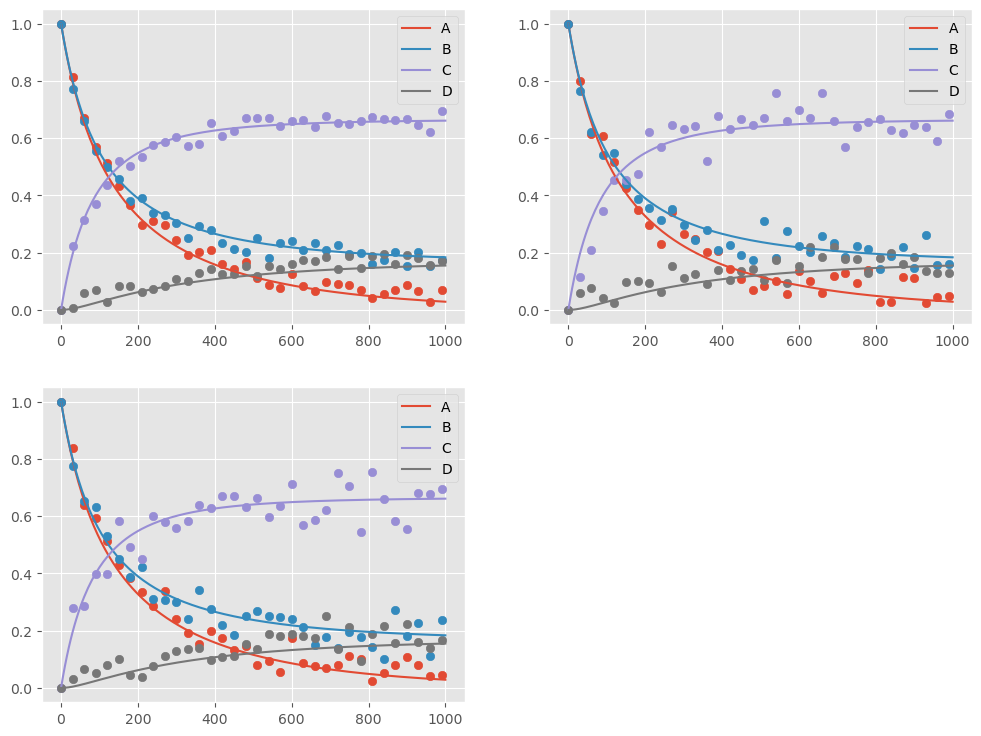

In [41]:
groups = df_ex.groupby("id")
plt.figure(figsize=(12,9))
species = ["A", "B", "C", "D"]
for name, group in groups:
    plt.subplot(2,2,name)
    for i in species: #A,B,C,D
        plt.scatter(group.index, group[i+"(exp)"], label="")
        plt.plot(df_sim3.index, df_sim3[i],label=i)
    plt.legend()
plt.show()

In [43]:
group_t = df_ex.groupby(level="Time[min]")

In [47]:
species_ex = ["A(exp)","B(exp)","C(exp)","D(exp)"]
df_ave = group_t[species_ex].mean()

In [51]:
df_ave.head()

,A(exp),B(exp),C(exp),D(exp)
Time[min],,,,
0,1.000000,1.000000,0.000000,0.000000
30,0.818080,0.769971,0.205880,0.031531
60,0.641198,0.644452,0.269237,0.068027
90,0.589785,0.576097,0.370085,0.053969
120,0.513866,0.525938,0.430062,0.044208


In [55]:
df_errors = pd.DataFrame()
for i in species:
    diff = (df_ave[i+"(exp)"] - df_sim3[i]) **2
    df_errors[i] = diff

In [57]:
df_errors

,A,B,C,D
Time[min],,,,
0,0.000000,0.000000,0.000000,0.000000
5,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN
...,...,...,...,...
980,NaN,NaN,NaN,NaN
985,NaN,NaN,NaN,NaN
990,0.000633,0.000033,0.000849,0.000001


In [61]:
df_errors = df_errors.dropna() #NaN drop(落とす)

In [63]:
df_errors

,A,B,C,D
Time[min],,,,
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
30,4.949457e-04,9.243204e-04,1.165246e-04,7.284483e-04
60,1.768969e-04,5.719340e-04,2.354770e-03,2.932989e-03
90,1.534399e-03,6.531124e-07,8.971075e-04,8.581613e-04
120,1.842081e-03,3.755786e-04,7.711147e-04,7.389040e-05
150,4.758294e-04,2.130975e-05,3.877152e-04,2.304434e-03
180,9.097688e-05,7.257268e-04,1.704501e-03,4.555006e-04
210,1.444935e-05,9.046553e-05,4.030392e-04,3.018810e-07
240,9.538875e-06,9.349922e-04,8.188934e-05,4.884413e-06


In [65]:
df_num = df_errors.sum()

In [67]:
df_num

A    0.033022
B    0.025805
C    0.021283
D    0.036542
dtype: float64

In [75]:
denom = df_ave.var(ddof=0) * df_ave.shape[0]

In [77]:
denom

A(exp)    1.818340
B(exp)    1.205078
C(exp)    0.778009
D(exp)    0.094567
dtype: float64

In [85]:
for i, j in enumerate(species):
    print(j, 1.0 - df_num[j] / denom[j+"(exp)"]) #決定係数の算出

A 0.9818392277242951
B 0.9785867487484551
C 0.9726437013080427
D 0.6135868384449772
